Math 5750/6880: Mathematics of Data Science \
Project 4

# 1. Exploratory Analysis

Use the following code to download the dataset from
[https://www.kaggle.com/code/mineshjethva/eda-pulsedb/notebook](https://www.kaggle.com/code/mineshjethva/eda-pulsedb/notebook). The dataset is described in the paper [https://doi.org/10.3389/fdgth.2022.1090854](https://doi.org/10.3389/fdgth.2022.1090854).

I would recommend saving the data files to a google drive (or your local machine) so that you don't have to download them again. Note that the 5 data files correspond to the 5 columns in Table 4 of the paper.


In [2]:
# download the data from kagglehub
# The dataset is 17.3 G
# This took about 15min using university wifi and, if
# you save the data, you should only have to do it once

import kagglehub
path = kagglehub.dataset_download("weinanwangrutgers/pulsedb-balanced-training-and-testing")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'pulsedb-balanced-training-and-testing' dataset.
Path to dataset files: /kaggle/input/pulsedb-balanced-training-and-testing


In [3]:
# run this block to move the data to a permanent directory in your drive

import os, glob
from google.colab import drive
drive.mount('/content/drive')
DATA_DIR = "/content/drive/MyDrive/pulsedb/"
!mkdir -p $DATA_DIR
!cp -r $path/* $DATA_DIR

Mounted at /content/drive


In [4]:
# run this block after data is saved to your drive

import os, glob
from google.colab import drive
drive.mount('/content/drive')
DATA_DIR = "/content/drive/MyDrive/pulsedb/"

mat_files = sorted(glob.glob(os.path.join(DATA_DIR, "**", "*.mat"), recursive=True))
print(f"Found {len(mat_files)} .mat files")
for f in mat_files:
    print(" -", f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 5 .mat files
 - /content/drive/MyDrive/pulsedb/VitalDB_AAMI_Cal_Subset.mat
 - /content/drive/MyDrive/pulsedb/VitalDB_AAMI_Test_Subset.mat
 - /content/drive/MyDrive/pulsedb/VitalDB_CalBased_Test_Subset.mat
 - /content/drive/MyDrive/pulsedb/VitalDB_CalFree_Test_Subset.mat
 - /content/drive/MyDrive/pulsedb/VitalDB_Train_Subset.mat


Now we'll load the data. The data is about 20GB, which exceeds the colab basic RAM allocation. You can check your RAM using

`!cat /proc/meminfo`

You should upgrade to colab pro, which is free for students.

[https://colab.research.google.com/signup](https://colab.research.google.com/signup)

Then in 'change runtime type' click A100 GPU and high RAM.

In [5]:
# load the data
# the subject information is stored in a pandas df
# the Signals (ECG, PPG, ABP) are stored in numpy arrays
# this block takes 11 minutes to execute

!cat /proc/meminfo

!pip install mat73
import mat73
import pandas as pd
import numpy as np

def load_mat_file(file_path):
    data_dict = mat73.loadmat(file_path)['Subset']
    print('finished loading'+file_path)
    # print(data_dict.keys())

    # first handle Signals
    ECG = data_dict['Signals'][:,0,:]
    PPG = data_dict['Signals'][:,1,:]
    ABP = data_dict['Signals'][:,2,:]
    data_dict.pop("Signals", None)

    data_dict['Age'] = data_dict['Age'].tolist()
    data_dict['BMI'] = data_dict['BMI'].tolist()
    data_dict['DBP'] = data_dict['DBP'].tolist()
    data_dict['Gender'] = [1 if x[0] == 'M' else 0 for x in data_dict['Gender']]
    data_dict['Height'] = data_dict['Height'].tolist()
    data_dict['SBP'] = data_dict['SBP'].tolist()
    data_dict['Subject'] = [x[0] for x in data_dict['Subject']]
    data_dict['Weight'] = data_dict['Weight'].tolist()

    data_df = pd.DataFrame(data_dict)
    print('constructed df')

    return data_df, ECG, PPG, ABP

df_CalBased_Test, ECG_CalBased_Test, PPG_CalBased_Test, ABP_CalBased_Test = load_mat_file(DATA_DIR+'VitalDB_CalBased_Test_Subset.mat')
df_Train, ECG_Train, PPG_Train, ABP_Train = load_mat_file(DATA_DIR+'VitalDB_Train_Subset.mat')

MemTotal:       175166496 kB
MemFree:        97786032 kB
MemAvailable:   171550108 kB
Buffers:          206176 kB
Cached:         73416960 kB
SwapCached:            0 kB
Active:          2189136 kB
Inactive:       72738716 kB
Active(anon):       1440 kB
Inactive(anon):  1305324 kB
Active(file):    2187696 kB
Inactive(file): 71433392 kB
Unevictable:          20 kB
Mlocked:              20 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               324 kB
Writeback:             0 kB
AnonPages:       1249732 kB
Mapped:           533548 kB
Shmem:              2016 kB
KReclaimable:    1738204 kB
Slab:            1987480 kB
SReclaimable:    1738204 kB
SUnreclaim:       249276 kB
KernelStack:       10480 kB
PageTables:        23116 kB
SecPageTables:         0 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:    87583248 kB
Committed_AS:    5321704 kB
VmallocTotal:   34359738367 kB
VmallocUsed:      103408 kB
VmallocChunk:  

In [ ]:
# df_CalBased_Test has 51720 entries
print(df_CalBased_Test.keys())
print(df_CalBased_Test.info())
print(df_CalBased_Test.describe())
df_CalBased_Test

Index(['Age', 'BMI', 'DBP', 'Gender', 'Height', 'SBP', 'Subject', 'Weight'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51720 entries, 0 to 51719
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      51720 non-null  float64
 1   BMI      51720 non-null  float64
 2   DBP      51720 non-null  float64
 3   Gender   51720 non-null  int64  
 4   Height   51720 non-null  float64
 5   SBP      51720 non-null  float64
 6   Subject  51720 non-null  object 
 7   Weight   51720 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 3.2+ MB
None
                Age           BMI           DBP        Gender        Height  \
count  51720.000000  51720.000000  51720.000000  51720.000000  51720.000000   
mean      58.980684     22.918826     62.936572      0.576953    162.502790   
std       15.032644      3.437789     12.070353      0.494048      9.641087   
min        0.400000     12.400000   

,Age,BMI,DBP,Gender,Height,SBP,Subject,Weight
0,48.0,20.7,68.482123,1,177.4,116.804871,p000001_1,65.0
1,48.0,20.7,66.047147,1,177.4,113.288819,p000001_1,65.0
2,48.0,20.7,66.378229,1,177.4,113.340180,p000001_1,65.0
3,48.0,20.7,59.910707,1,177.4,95.062698,p000001_1,65.0
4,48.0,20.7,89.850848,1,177.4,140.302555,p000001_1,65.0
...,...,...,...,...,...,...,...,...
51715,79.0,22.1,48.225986,1,169.6,109.266631,p006090_1,63.5
51716,79.0,22.1,48.607110,1,169.6,108.695099,p006090_1,63.5
51717,79.0,22.1,55.178004,1,169.6,110.514411,p006090_1,63.5
51718,79.0,22.1,47.861650,1,169.6,104.640197,p006090_1,63.5


In [6]:
# 1293 subjects, 40 samples/ subject = 51720 samples
df_CalBased_Test['Subject'].value_counts()

,count
Subject,
p006090_1,40
p000001_1,40
p000003_1,40
p000005_1,40
p000012_1,40
...,...
p000063_1,40
p000064_1,40
p000074_1,40


Train subset size: 465480 samples
Calibration test subset size: 51720 samples
Number of subjects: 1293 subjects
Samples per subject: [40]
Signals included: ECG, PPG, ABP
ECG_Train shape: (465480, 1250)
PPG_Train shape: (465480, 1250)
ABP_Train shape: (465480, 1250)
Metadata columns in Train subset:
['Age', 'BMI', 'DBP', 'Gender', 'Height', 'SBP', 'Subject', 'Weight']
=== Training Set Summary ===
                 Age            BMI            DBP         Gender  \
count  465480.000000  465480.000000  465480.000000  465480.000000   
mean       58.980983      22.918767      62.915730       0.576953   
std        15.032404       3.437773      12.084088       0.494043   
min         0.400000      12.400000      16.226861       0.000000   
25%        51.000000      20.700000      54.445346       0.000000   
50%        61.000000      22.800000      62.174959       1.000000   
75%        70.000000      25.000000      70.523158       1.000000   
max        92.000000      40.300000     276.92787

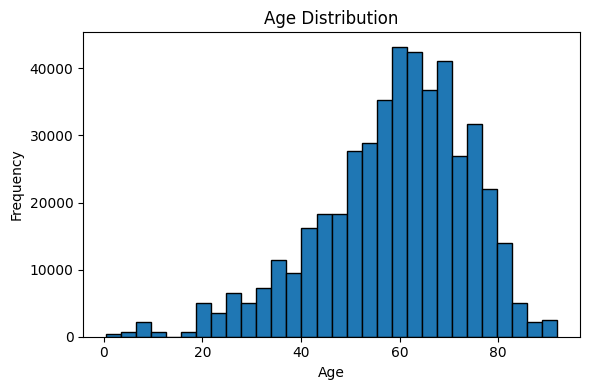

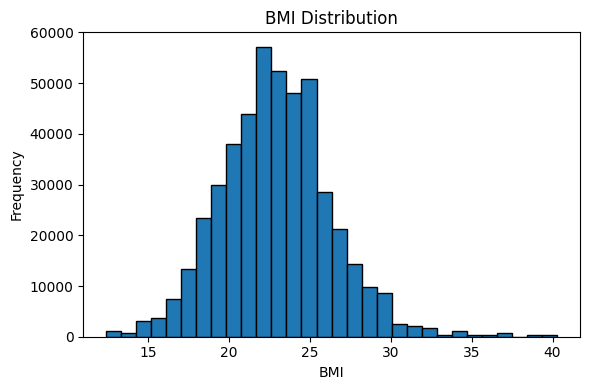

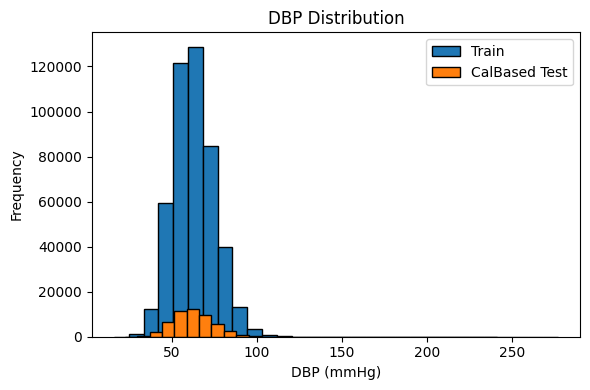

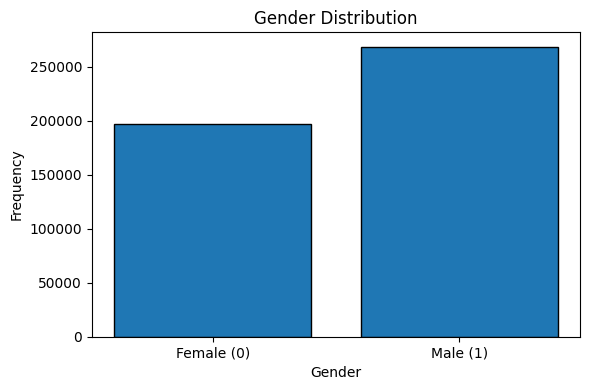

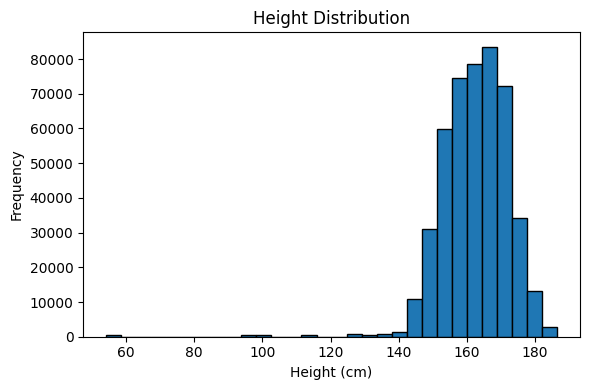

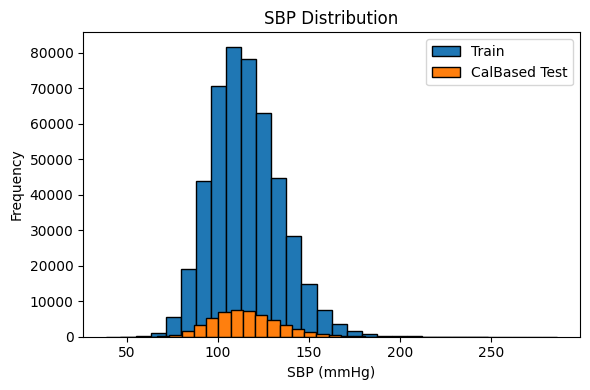

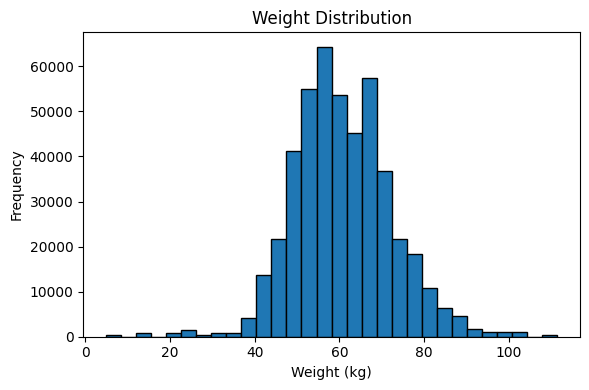

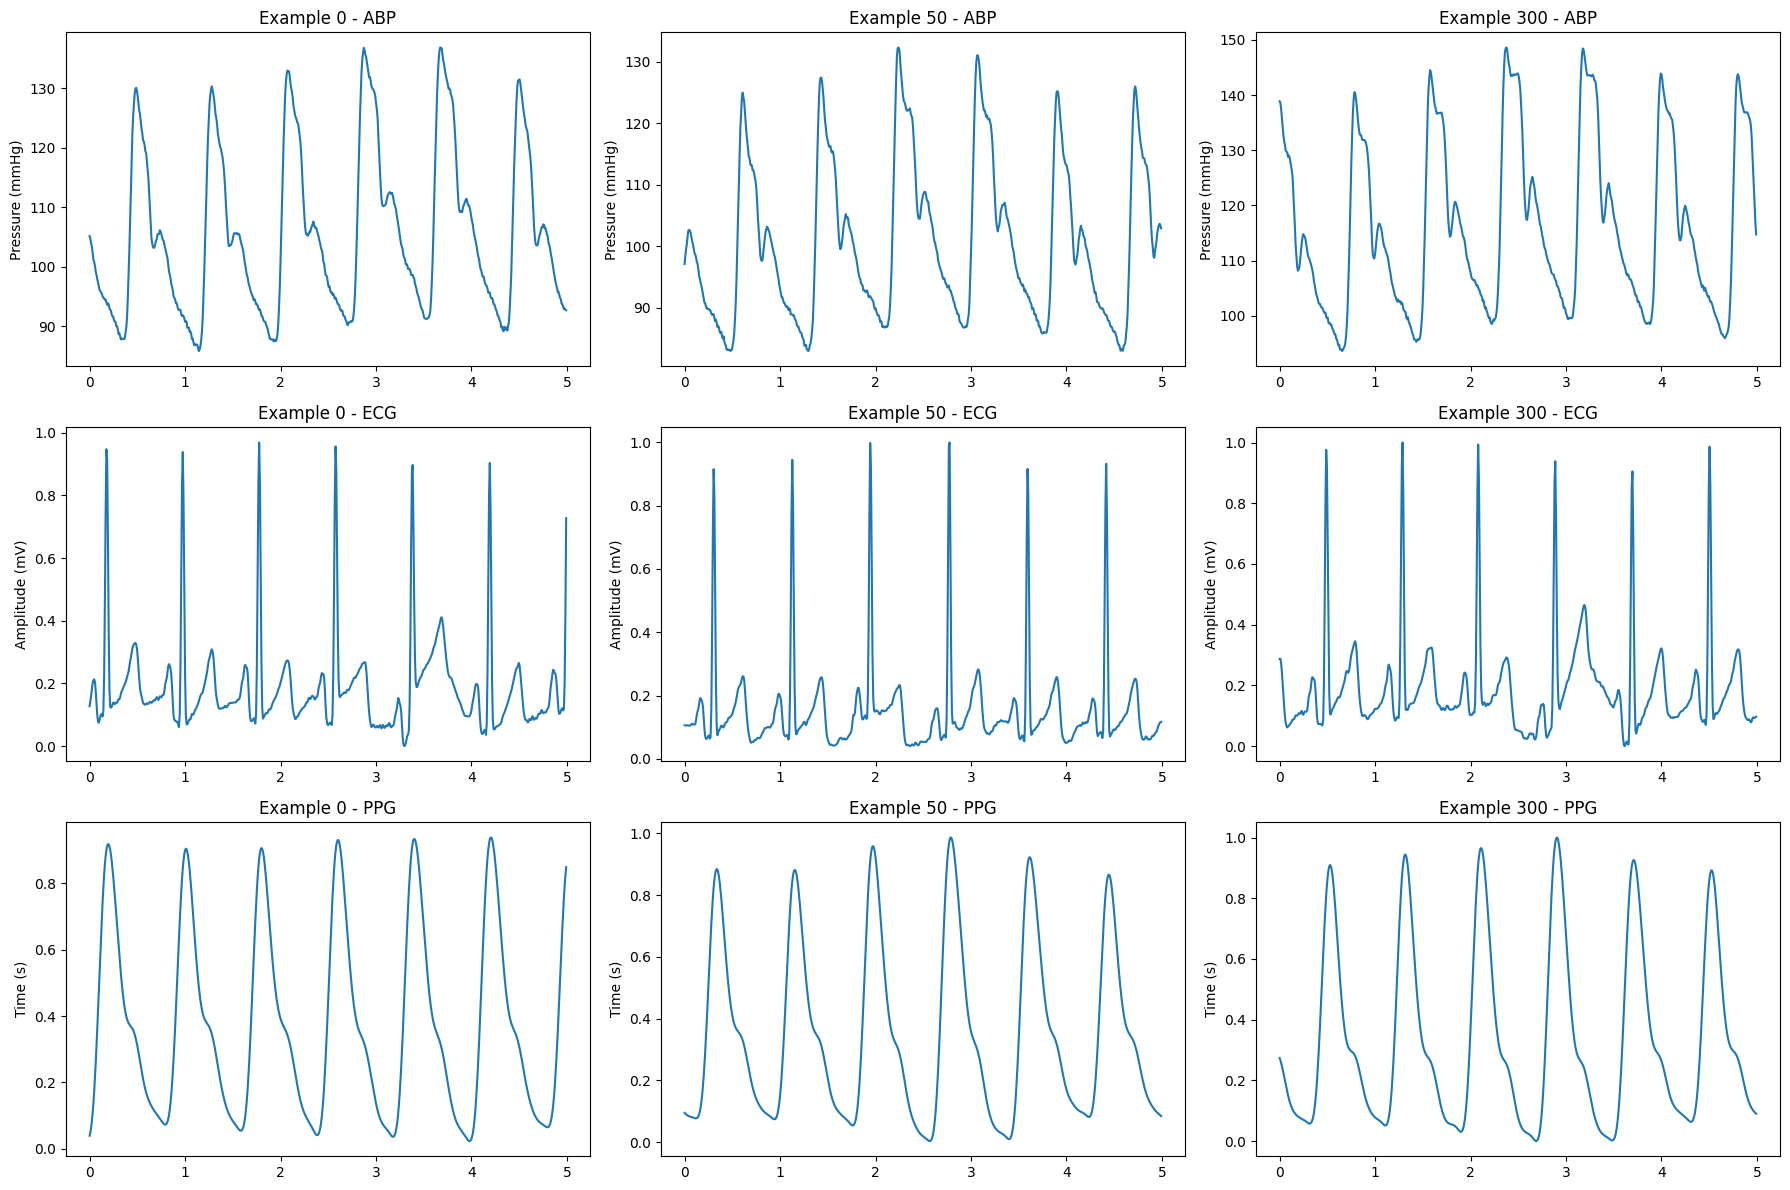

In [7]:
# your code here
import matplotlib.pyplot as plt

# ======== Data set overview ========
print("Train subset size:", len(df_Train), "samples")
print("Calibration test subset size:", len(df_CalBased_Test), "samples")
num_subjects = df_CalBased_Test['Subject'].nunique()

print("Number of subjects:", num_subjects, "subjects")

samples_per_subject = df_CalBased_Test['Subject'].value_counts().unique()
print("Samples per subject:", samples_per_subject)

print("Signals included: ECG, PPG, ABP")
print("ECG_Train shape:", ECG_Train.shape)
print("PPG_Train shape:", PPG_Train.shape)
print("ABP_Train shape:", ABP_Train.shape)

print("Metadata columns in Train subset:")
print(df_Train.columns.tolist())

# ======== summary statistics ========

print("=== Training Set Summary ===")
print(df_Train.describe())

print("\n=== CalBased Test Set Summary ===")
print(df_CalBased_Test.describe())

print("\n=== Gender in Training Set ===")
print(df_Train['Gender'].value_counts())

print("\n=== Gender in CalBased Test Set ===")
print(df_CalBased_Test['Gender'].value_counts())

# ======== draw the plots for all datas ========

plt.rcParams['figure.figsize'] = (6, 4) # unify the size of plots

#Age
plt.figure()
plt.hist(df_Train['Age'], bins = 30, edgecolor = 'black')
plt.title('Age Distribution')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()

#BMI
plt.figure()
plt.hist(df_Train['BMI'], bins = 30, edgecolor = 'black')
plt.title('BMI Distribution')
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.tight_layout()

# DBP
plt.figure()
plt.hist(df_Train['DBP'], bins = 30, edgecolor = 'black', label = 'Train')
plt.hist(df_CalBased_Test['DBP'], bins = 30, edgecolor = 'black', label = "CalBased Test")
plt.title('DBP Distribution')
plt.xlabel("DBP (mmHg)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.legend() # color

# Gender
plt.figure()
plt.hist(df_Train['Gender'], bins=[-0.5, 0.5, 1.5], rwidth=0.8, edgecolor='black')
plt.xticks([0, 1], ['Female (0)', 'Male (1)'])
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Height
plt.figure()
plt.hist(df_Train['Height'], bins = 30, edgecolor = 'black')
plt.title('Height Distribution')
plt.xlabel("Height (cm)")
plt.ylabel("Frequency")
plt.tight_layout()

# SBP
plt.figure()
plt.hist(df_Train['SBP'], bins = 30, edgecolor = 'black', label = 'Train')
plt.hist(df_CalBased_Test['SBP'], bins = 30, edgecolor = 'black', label = "CalBased Test")
plt.title('SBP Distribution')
plt.xlabel("SBP (mmHg)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.legend()

# Weight
plt.figure()
plt.hist(df_Train['Weight'], bins = 30, edgecolor = 'black')
plt.title('Weight Distribution')
plt.xlabel("Weight (kg)")
plt.ylabel("Frequency")
plt.tight_layout()

plt.show()

# ======== draw the plots for ABP, ECG, PPG ========

fs = 125 # 125 Hz

indices = [0, 50, 300]

plt.figure(figsize=(18, 12))

for i, idx in enumerate(indices):
  abp = ABP_Train[idx]
  ecg = ECG_Train[idx]
  ppg = PPG_Train[idx]

  # take signals in the first 5s
  N = min(len(ecg), fs * 5)
  t = np.arange(N) / fs

  # ABP
  plt.subplot(3, 3, 1 + i)
  plt.plot(t, abp[:N])
  plt.title(f"Example {idx} - ABP")
  plt.ylabel("Pressure (mmHg)")

  # ECG
  plt.subplot(3, 3, 4 + i)
  plt.plot(t, ecg[:N])
  plt.title(f"Example {idx} - ECG")
  plt.ylabel("Amplitude (mV)")

  # PPG
  plt.subplot(3, 3, 7 + i)
  plt.plot(t, ppg[:N])
  plt.title(f"Example {idx} - PPG")
  plt.ylabel("Time (s)")

plt.tight_layout()
plt.show()



#2. Blood Pressure Prediction


In [ ]:
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers, models

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

import matplotlib.pyplot as plt

# ======== Get data ========
# method for Ridge
def build_flat_features(ECG, PPG):
    ECG_f = ECG.reshape(ECG.shape[0], -1)
    PPG_f = PPG.reshape(PPG.shape[0], -1)
    return np.concatenate([ECG_f, PPG_f], axis=1)

X_train_flat = build_flat_features(ECG_Train, PPG_Train)
X_test_flat  = build_flat_features(ECG_CalBased_Test, PPG_CalBased_Test)

print("Train flat:", X_train_flat.shape)
print("Test flat:", X_test_flat.shape)

# method for fcnn and LSTM
def build_seq_features(ECG, PPG):
    ECG = ECG[..., np.newaxis]
    PPG = PPG[..., np.newaxis]
    return np.concatenate([ECG, PPG], axis=-1)

X_train_seq = build_seq_features(ECG_Train, PPG_Train)
X_test_seq  = build_seq_features(ECG_CalBased_Test, PPG_CalBased_Test)

print("Train seq:", X_train_seq.shape)
print("Test seq:", X_test_seq.shape)

# extract labels
y_train_SBP = np.array(df_Train["SBP"])
y_train_DBP = np.array(df_Train["DBP"])

y_test_SBP = np.array(df_CalBased_Test["SBP"])
y_test_DBP = np.array(df_CalBased_Test["DBP"])

print("y_train_SBP:", y_train_SBP.shape)
print("y_train_DBP:", y_train_DBP.shape)
print("y_test_SBP: ", y_test_SBP.shape)
print("y_test_DBP: ", y_test_DBP.shape)

# ======== Evaluate ========
def evaluate(y_true, y_pred, name=""):

    # y_true = np.asarray(y_true).reshape(-1)
    # y_pred = np.asarray(y_pred).reshape(-1)

    err = y_pred - y_true
    ME = float(np.mean(err))
    SDE = float(np.std(err))
    MAE = float(mean_absolute_error(y_true, y_pred))
    R2  = float(r2_score(y_true, y_pred))

    print(f"\n===== {name} =====")
    print(f"ME  = {ME:.3f}")
    print(f"SDE = {SDE:.3f}")
    print(f"MAE = {MAE:.3f}")
    print(f"R²  = {R2:.4f}")

    return ME, SDE, MAE, R2

# ======== Plots ========
def plot_true_vs_pred(y_true, y_pred, title, max_points=3000):
    y_true = np.asarray(y_true).ravel()
    y_pred = np.asarray(y_pred).ravel()

    n = len(y_true)
    if n > max_points:
        idx = np.random.choice(n, size=max_points, replace=False)
        y_true_plot = y_true[idx]
        y_pred_plot = y_pred[idx]
    else:
        y_true_plot = y_true
        y_pred_plot = y_pred

    plt.figure(figsize=(6, 6))
    plt.scatter(y_true_plot, y_pred_plot, s=5, alpha=0.4)
    plt.plot([y_true.min(), y_true.max()],
             [y_true.min(), y_true.max()],
             linewidth=1)
    plt.xlabel("True")
    plt.ylabel("Predicted")
    plt.title(title)
    plt.tight_layout()
    plt.show()

# ======== Ridge ========

from sklearn.linear_model import Ridge

# SBP
ridge_sbp = Ridge(alpha=1.0)
ridge_sbp.fit(X_train_flat, y_train_SBP)

sbp_pred_ridge = ridge_sbp.predict(X_test_flat)
metrics_ridge_sbp = evaluate(y_test_SBP, sbp_pred_ridge, name="Ridge - SBP")
plot_true_vs_pred(y_test_SBP, sbp_pred_ridge, "Ridge Regression - SBP")

# DBP
ridge_dbp = Ridge(alpha=1.0)
ridge_dbp.fit(X_train_flat, y_train_DBP)

dbp_pred_ridge = ridge_dbp.predict(X_test_flat)
metrics_ridge_dbp = evaluate(y_test_DBP, dbp_pred_ridge, name="Ridge - DBP")
plot_true_vs_pred(y_test_DBP, dbp_pred_ridge, "Ridge Regression - DBP")

# ======== Fully Connected NN ========
input_dim = X_train_flat.shape[1]

def build_fc_model(input_dim):
    model = tf.keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(256, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="adam", loss="mse")
    return model

# SBP
fc_sbp = build_fc_model(input_dim)
fc_sbp.summary()

fc_sbp.fit(X_train_flat, y_train_SBP,epochs=3)

sbp_pred_fc = fc_sbp.predict(X_test_flat).squeeze()
metrics_fc_sbp = evaluate(y_test_SBP, sbp_pred_fc, name="FC NN - SBP")
plot_true_vs_pred(y_test_SBP, sbp_pred_fc, "FC NN - SBP")

# DBP
fc_dbp = build_fc_model(input_dim)

fc_dbp.fit(X_train_flat, y_train_DBP, epochs=3)

dbp_pred_fc = fc_dbp.predict(X_test_flat).squeeze()
metrics_fc_dbp = evaluate(y_test_DBP, dbp_pred_fc, name="FC NN - DBP")
plot_true_vs_pred(y_test_DBP, dbp_pred_fc, "FC NN - DBP")

# ======== RNN ========
T = X_train_seq.shape[1]
F = X_train_seq.shape[2]

def build_rnn_model(T, F):
    inputs = layers.Input(shape=(T, F))
    x = layers.SimpleRNN(64)(inputs)
    x = layers.Dense(32, activation="relu")(x)
    outputs = layers.Dense(1)(x)
    model = models.Model(inputs, outputs)
    model.compile(optimizer="adam", loss="mse")
    return model

# SBP
rnn_sbp = build_rnn_model(T, F)
rnn_sbp.fit(X_train_seq, y_train_SBP, epochs=3)

sbp_pred_rnn = rnn_sbp.predict(X_test_seq).squeeze()
metrics_rnn_sbp = evaluate(y_test_SBP, sbp_pred_rnn, "RNN - SBP")
plot_true_vs_pred(y_test_SBP, sbp_pred_rnn, "RNN - SBP")

# DBP
rnn_dbp = build_rnn_model(T, F)
rnn_dbp.fit(X_train_seq, y_train_DBP, epochs=3)

dbp_pred_rnn = rnn_dbp.predict(X_test_seq).squeeze()
metrics_rnn_dbp = evaluate(y_test_DBP, dbp_pred_rnn, "RNN - DBP")
plot_true_vs_pred(y_test_DBP, dbp_pred_rnn, "RNN - DBP")

# ======== Challege ========
def build_seq_features(ECG, PPG):
    ECG_3d = ECG[..., np.newaxis]
    PPG_3d = PPG[..., np.newaxis]
    return np.concatenate([ECG_3d, PPG_3d], axis=-1)

X_train_seq = build_seq_features(ECG_Train, PPG_Train)
X_test_seq  = build_seq_features(ECG_CalBased_Test, PPG_CalBased_Test)

print("X_train_seq:", X_train_seq.shape)
print("X_test_seq: ", X_test_seq.shape)

Y_train_abp = ABP_Train[..., np.newaxis]
Y_test_abp  = ABP_CalBased_Test[..., np.newaxis]

print("Y_train_abp:", Y_train_abp.shape)
print("Y_test_abp: ", Y_test_abp.shape)

# plot
def plot_abp_waveform(Y_true, Y_pred, idx=0, title="", fs=125, seconds=4):
    # ---- prepare data ----
    y_true = np.asarray(Y_true[idx]).squeeze()
    y_pred = np.asarray(Y_pred[idx]).squeeze()

    T = len(y_true)
    max_T = min(T, int(fs * seconds))

    # time axis
    t = np.arange(max_T) / fs

    # ---- plot ----
    plt.figure(figsize=(10, 3))
    plt.plot(t, y_true[:max_T], label="True ABP", linewidth=1.5)
    plt.plot(t, y_pred[:max_T], label="Predicted ABP", linewidth=1.2, alpha=0.8)

    plt.xlabel("Time (s)")
    plt.ylabel("Blood Pressure (mmHg)")
    plt.title(f"{title} — ABP waveform (sample {idx}, first {seconds}s)")
    plt.legend()
    plt.tight_layout()
    plt.show()

# ======== Ridge ========
N_train, T, F = X_train_seq.shape
N_test = X_test_seq.shape[0]

X_train_seq_flat = X_train_seq.reshape(N_train, -1)
X_test_seq_flat  = X_test_seq.reshape(N_test, -1)
Y_train_abp_flat = Y_train_abp.reshape(N_train, T)

ridge_seq2seq = Ridge(alpha=1.0)
ridge_seq2seq.fit(X_train_seq_flat, Y_train_abp_flat)

ABP_pred_linear_flat = ridge_seq2seq.predict(X_test_seq_flat)
ABP_pred_linear = ABP_pred_linear_flat[..., np.newaxis]

plot_abp_waveform(Y_test_abp, ABP_pred_linear, 0, "Ridge Linear Seq2Seq")

# ======== Fully Connected NN ========
def build_fcnn_seq2seq(T, F):
    inputs = layers.Input(shape=(T, F))
    x = layers.TimeDistributed(layers.Dense(64, activation="relu"))(inputs)
    x = layers.TimeDistributed(layers.Dense(32, activation="relu"))(x)
    outputs = layers.TimeDistributed(layers.Dense(1))(x)
    model = models.Model(inputs, outputs)
    model.compile(optimizer="adam", loss="mse")
    return model

fcnn_seq2seq = build_fcnn_seq2seq(T, F)
fcnn_seq2seq.fit(X_train_seq, Y_train_abp, epochs=3)

ABP_pred_fcnn = fcnn_seq2seq.predict(X_test_seq)
plot_abp_waveform(Y_test_abp, ABP_pred_fcnn,   0, "FCNN Seq2Seq")





X_train_seq: (465480, 1250, 2)
X_test_seq:  (51720, 1250, 2)
Y_train_abp: (465480, 1250, 1)
Y_test_abp:  (51720, 1250, 1)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1250, 2)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 1250, 64)       │           192 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 1250, 32)       │         2,080 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, 1250, 1)        │            33 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,305 (9.00 KB)

 Trainable params: 2,305 (9.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3


#3. Generative Modeling

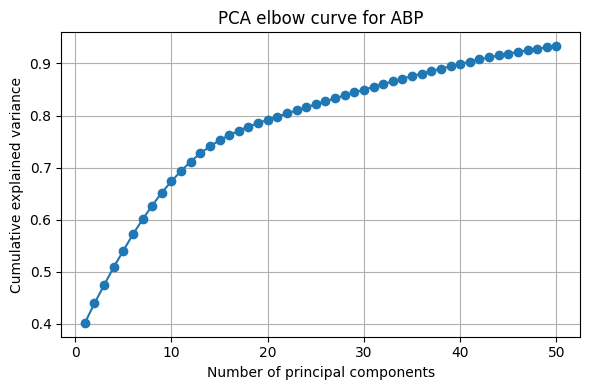

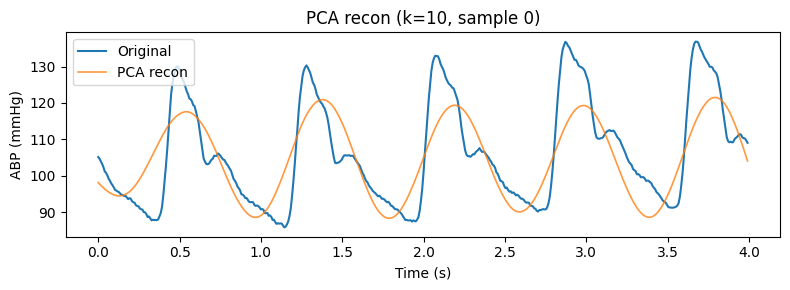

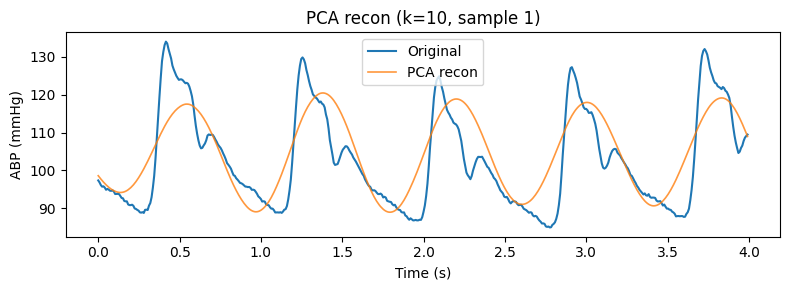

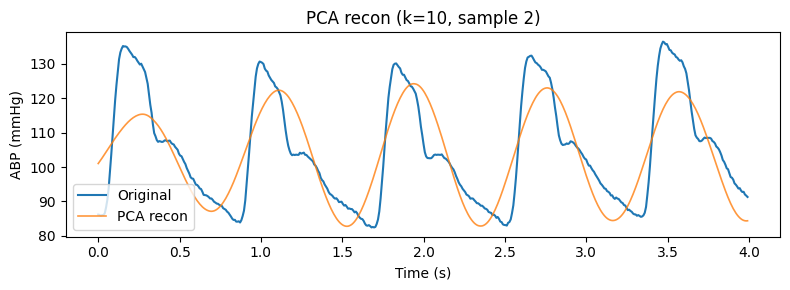

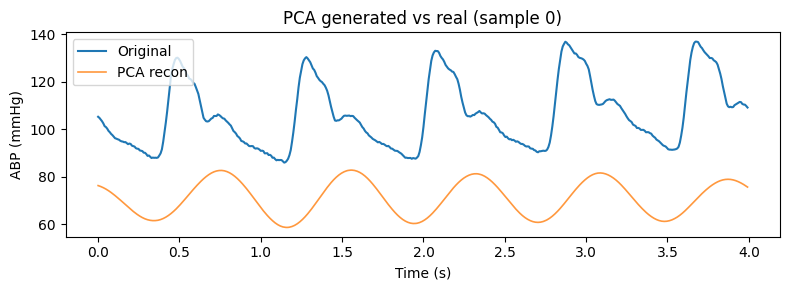

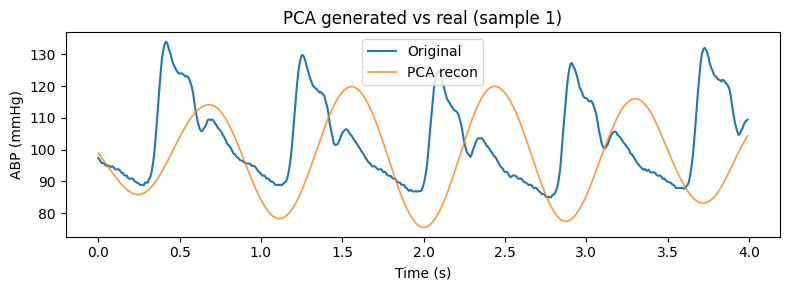

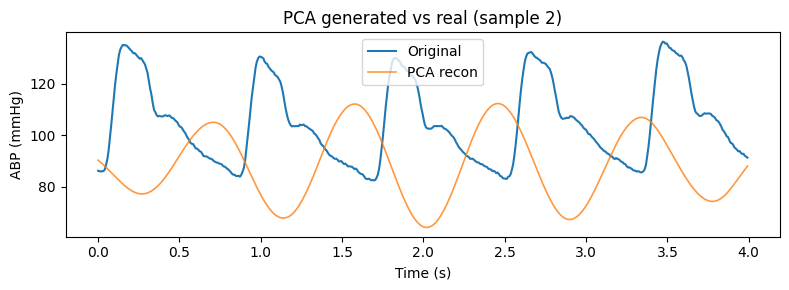

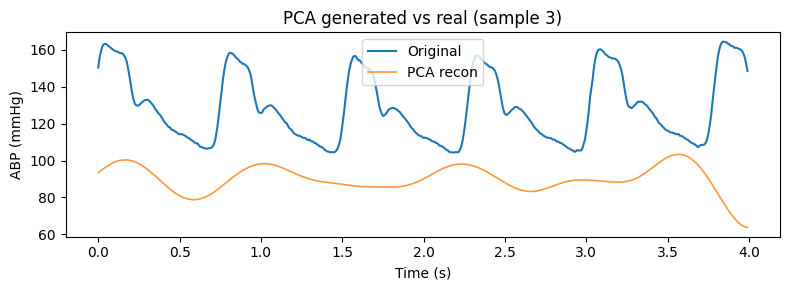

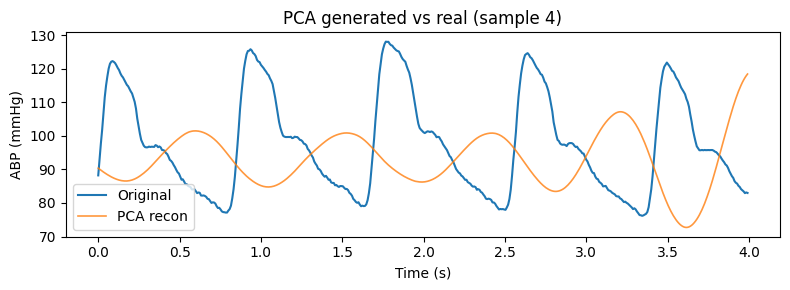

latent_dim=4, val MSE=123.9523
latent_dim=8, val MSE=73.2619
latent_dim=16, val MSE=58.9595
latent_dim=32, val MSE=40.4785


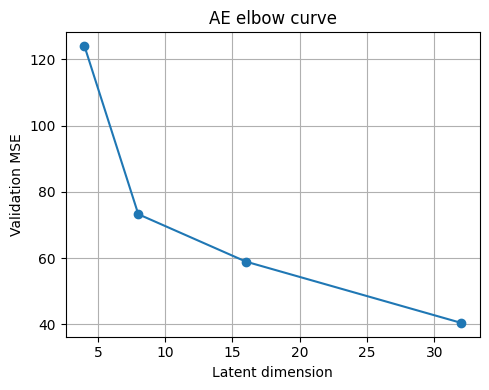

Epoch 1/10
1455/1455 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - loss: 381.4560 - val_loss: 97.7964
Epoch 2/10
1455/1455 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 90.5603 - val_loss: 76.6582
Epoch 3/10
1455/1455 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 72.9183 - val_loss: 64.9588
Epoch 4/10
1455/1455 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 62.9020 - val_loss: 58.2261
Epoch 5/10
1455/1455 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 57.0139 - val_loss: 54.0992
Epoch 6/10
1455/1455 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 52.9666 - val_loss: 52.2932
Epoch 7/10
1455/1455 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 50.6098 - val_loss: 49.0428
Epoch 8/10
1455/1455 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 48.5719 - val_loss: 46.8706
Epoch 9/10
1455/1455 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 46.9638 - val_loss: 47.2528
Epoch 10/10
1455/1455 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 45.5218 - val_loss: 45.2433
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


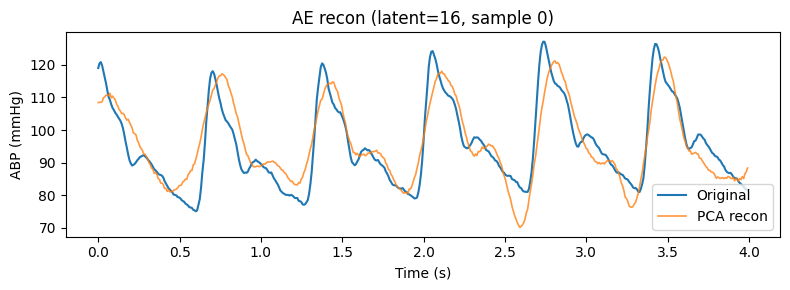

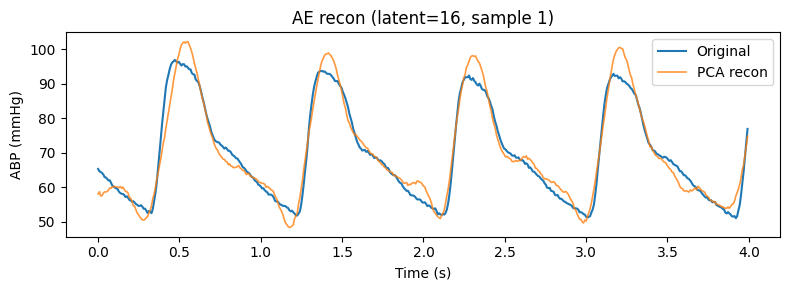

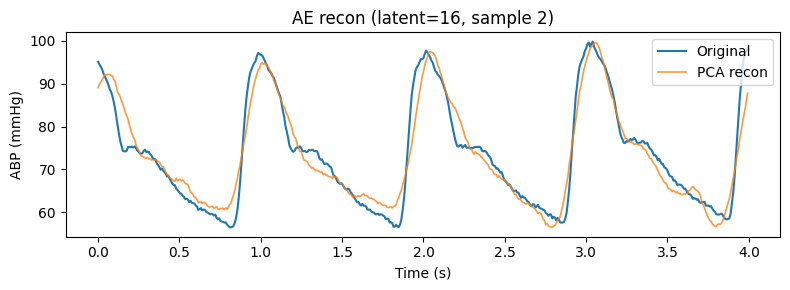

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step


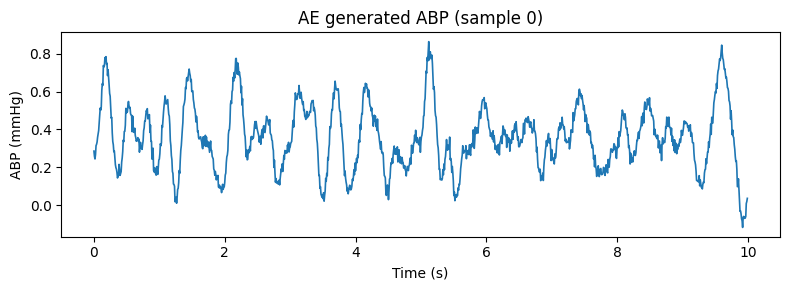

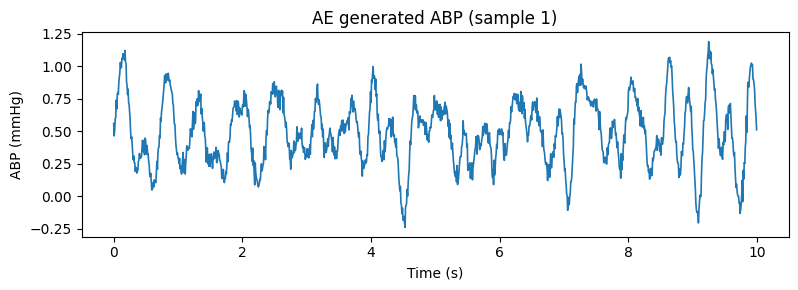

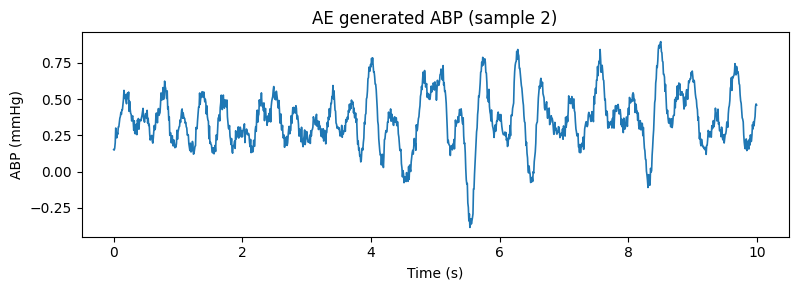

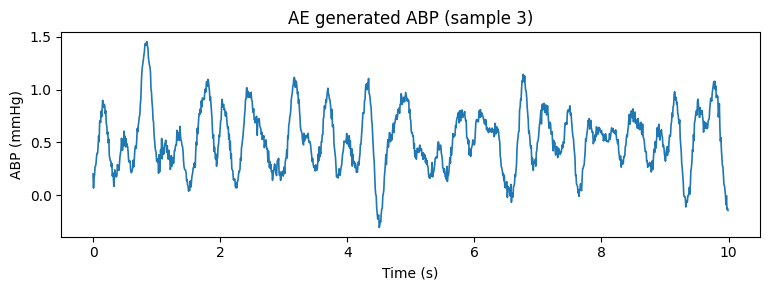

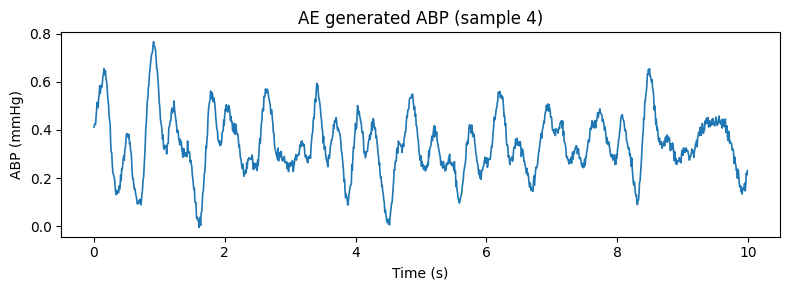

step 200/18180, loss=0.9997
step 400/18180, loss=1.0059
step 600/18180, loss=1.0006
step 800/18180, loss=0.9981
step 1000/18180, loss=1.0022
step 1200/18180, loss=0.9994
step 1400/18180, loss=0.9947
step 1600/18180, loss=0.9987
step 1800/18180, loss=0.9989
step 2000/18180, loss=0.9935
step 2200/18180, loss=0.9882
step 2400/18180, loss=0.9780
step 2600/18180, loss=0.9798
step 2800/18180, loss=0.9747
step 3000/18180, loss=0.9695
step 3200/18180, loss=0.9725
step 3400/18180, loss=0.9617
step 3600/18180, loss=0.9602
step 3800/18180, loss=0.9586
step 4000/18180, loss=0.9598
step 4200/18180, loss=0.9534
step 4400/18180, loss=0.9559
step 4600/18180, loss=0.9515
step 4800/18180, loss=0.9545
step 5000/18180, loss=0.9509
step 5200/18180, loss=0.9501
step 5400/18180, loss=0.9469
step 5600/18180, loss=0.9424
step 5800/18180, loss=0.9474
step 6000/18180, loss=0.9490
step 6200/18180, loss=0.9491
step 6400/18180, loss=0.9383
step 6600/18180, loss=0.9378
step 6800/18180, loss=0.9419
step 7000/18180, l

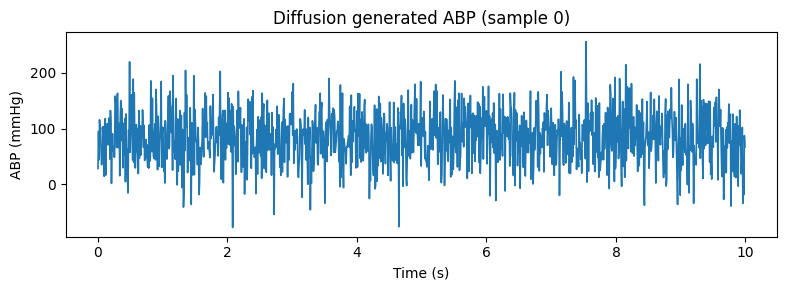

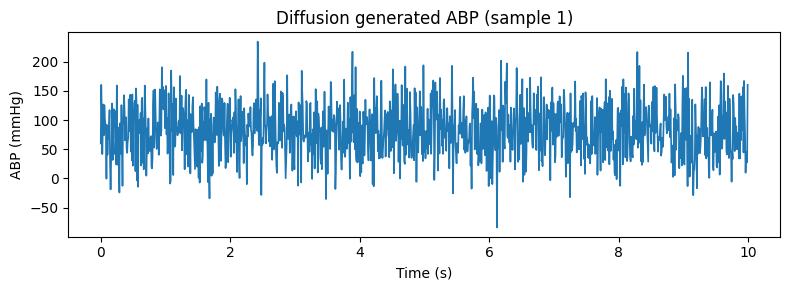

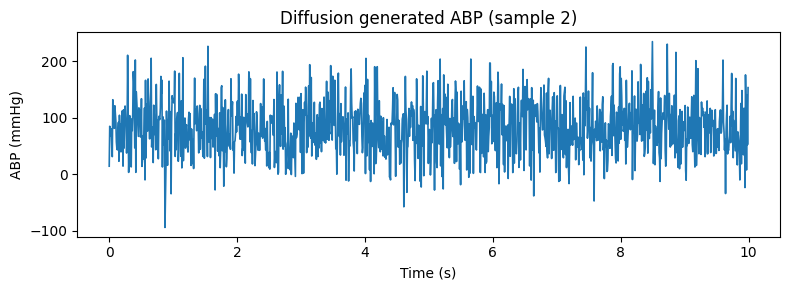

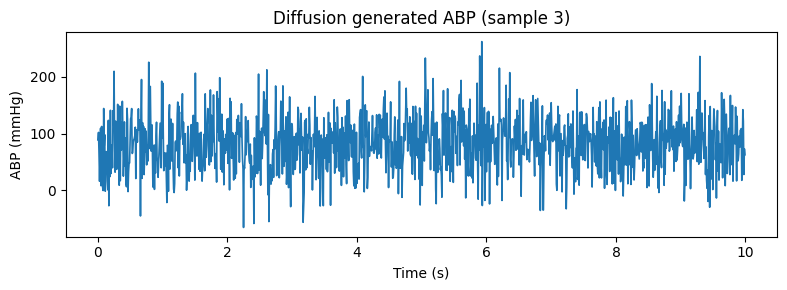

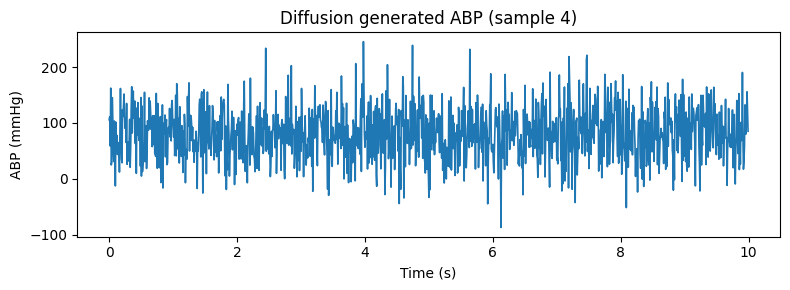

/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/trainer.py:83: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


epoch 200, d_loss=2.9750, g_loss=0.0482
epoch 400, d_loss=3.6543, g_loss=0.0245
epoch 600, d_loss=4.0602, g_loss=0.0164
epoch 800, d_loss=4.3550, g_loss=0.0123
epoch 1000, d_loss=4.5878, g_loss=0.0099
epoch 1200, d_loss=4.7825, g_loss=0.0082
epoch 1400, d_loss=4.9501, g_loss=0.0071
epoch 1600, d_loss=5.0984, g_loss=0.0062
epoch 1800, d_loss=5.2320, g_loss=0.0055
epoch 2000, d_loss=5.3540, g_loss=0.0050


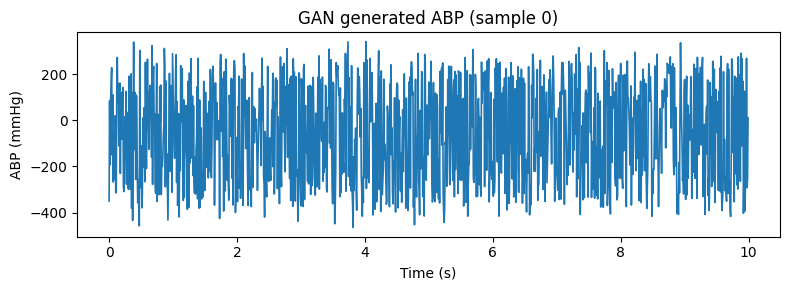

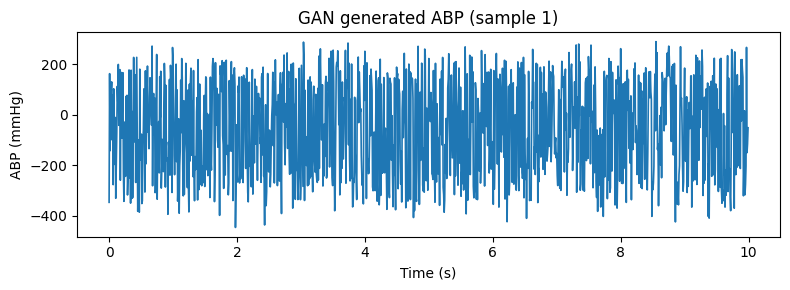

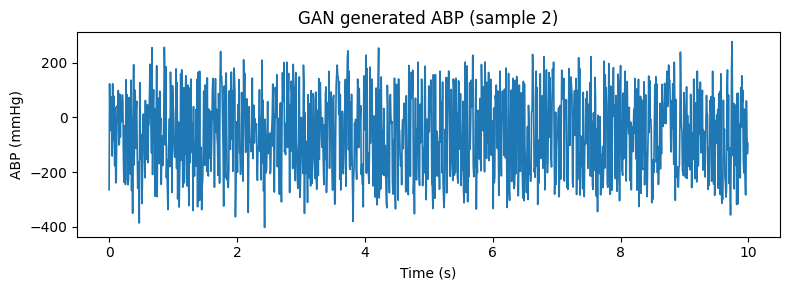

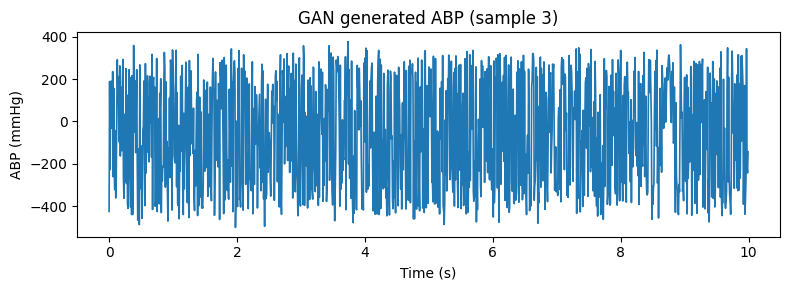

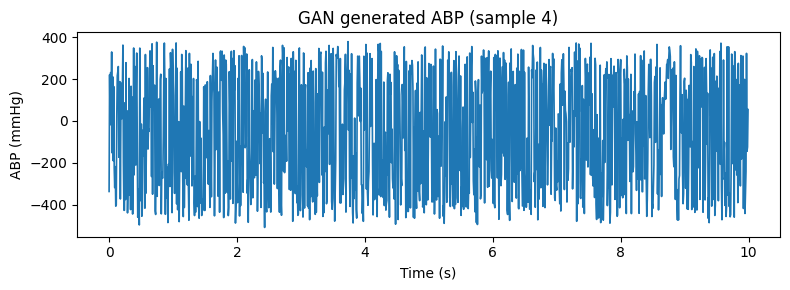

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras import layers, models

fs = 125.0

# ======== prepare data ========
X_train_abp = ABP_Train

N_train, T = X_train_abp.shape

# ======== PCA + elbow analysis ========
max_components = 50

pca_full = PCA(n_components=max_components)
pca_full.fit(X_train_abp)

explained = pca_full.explained_variance_ratio_
cum_explained = np.cumsum(explained)

plt.figure(figsize=(6, 4))
plt.plot(np.arange(1, max_components+1), cum_explained, marker="o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative explained variance")
plt.title("PCA elbow curve for ABP")
plt.grid(True)
plt.tight_layout()
plt.show()

# ======== reconstruction ========
k = 10

pca_k = PCA(n_components=k)
pca_k.fit(X_train_abp)
Z_train = pca_k.transform(X_train_abp)

X_train_recon = pca_k.inverse_transform(Z_train)

# ======== PCA reconstruct waver ========
def plot_abp_pair(true_sig, recon_sig, fs=125, seconds=4, title=""):
    T_full = len(true_sig)
    max_T = min(T_full, int(fs * seconds))
    t = np.arange(max_T) / fs

    plt.figure(figsize=(8, 3))
    plt.plot(t, true_sig[:max_T], label="Original", linewidth=1.5)
    plt.plot(t, recon_sig[:max_T], label="PCA recon", linewidth=1.2, alpha=0.8)
    plt.xlabel("Time (s)")
    plt.ylabel("ABP (mmHg)")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

for idx in [0, 1, 2]:
    plot_abp_pair(X_train_abp[idx], X_train_recon[idx],
                  fs=fs,
                  title=f"PCA recon (k={k}, sample {idx})")

# ======== PCA space -> ABP ========
Z_mean = Z_train.mean(axis=0)
Z_std  = Z_train.std(axis=0) + 1e-6

num_samples = 5
Z_fake = np.random.randn(num_samples, k) * Z_std + Z_mean
X_fake = pca_k.inverse_transform(Z_fake)

for i in range(num_samples):
    plot_abp_pair(X_train_abp[i], X_fake[i],
                  fs=fs,
                  title=f"PCA generated vs real (sample {i})")

# ======== train/val split ========
from sklearn.model_selection import train_test_split

X_train_ae, X_val_ae = train_test_split(X_train_abp, test_size=0.2, random_state=42)

input_dim = T

# ======== define a FC Autoencoder funct ========
def build_fc_autoencoder(latent_dim):
    inputs = layers.Input(shape=(input_dim,))
    x = layers.Dense(256, activation="relu")(inputs)
    x = layers.Dense(128, activation="relu")(x)
    z = layers.Dense(latent_dim, activation=None, name="latent")(x)

    x = layers.Dense(128, activation="relu")(z)
    x = layers.Dense(256, activation="relu")(x)
    outputs = layers.Dense(input_dim, activation=None)(x)

    model = models.Model(inputs, outputs)
    model.compile(optimizer="adam", loss="mse")
    return model

# ======== latent_dim -> elbow analysis ========
latent_list = [4, 8, 16, 32]
val_losses = []

for ld in latent_list:
    ae = build_fc_autoencoder(ld)
    ae.fit(X_train_ae, X_train_ae,
           epochs=5,
           batch_size=256,
           validation_data=(X_val_ae, X_val_ae),
           verbose=0)
    val_loss = ae.evaluate(X_val_ae, X_val_ae, verbose=0)
    val_losses.append(val_loss)
    print(f"latent_dim={ld}, val MSE={val_loss:.4f}")

plt.figure(figsize=(5, 4))
plt.plot(latent_list, val_losses, marker="o")
plt.xlabel("Latent dimension")
plt.ylabel("Validation MSE")
plt.title("AE elbow curve")
plt.grid(True)
plt.tight_layout()
plt.show()

# ======== choose a latent_dim to retrain -> AE ========
best_latent_dim = 16

ae_final = build_fc_autoencoder(best_latent_dim)
ae_final.fit(X_train_ae, X_train_ae,
             epochs=10,
             batch_size=256,
             validation_data=(X_val_ae, X_val_ae))

X_val_recon_ae = ae_final.predict(X_val_ae)

for idx in [0, 1, 2]:
    plot_abp_pair(X_val_ae[idx], X_val_recon_ae[idx],
                  fs=fs,
                  title=f"AE recon (latent={best_latent_dim}, sample {idx})")

# ======== use decoder to create ABP ========
encoder = models.Model(ae_final.input,
                       ae_final.get_layer("latent").output)

latent_inputs = layers.Input(shape=(best_latent_dim,))
x = ae_final.layers[-3](latent_inputs)
x = ae_final.layers[-2](x)
dec_outputs = ae_final.layers[-1](x)
decoder = models.Model(latent_inputs, dec_outputs)

num_fake = 5
z_fake = np.random.randn(num_fake, best_latent_dim)
X_fake_ae = decoder.predict(z_fake)

for i in range(num_fake):
    plt.figure(figsize=(8, 3))
    t = np.arange(T) / fs
    plt.plot(t, X_fake_ae[i], label="AE generated", linewidth=1.2)
    plt.xlabel("Time (s)")
    plt.ylabel("ABP (mmHg)")
    plt.title(f"AE generated ABP (sample {i})")
    plt.tight_layout()
    plt.show()




# ======== Challenge ========
# ======== diffusion-based ========
# ======== Date：Use ABP_Train，specialization [-1, 1] ========
X_diff = ABP_Train.astype("float32")
mean_abp = X_diff.mean()
std_abp  = X_diff.std() + 1e-6
X_diff = (X_diff - mean_abp) / std_abp

N_train, T = X_diff.shape

# ======== 2. define beta schedule ========
T_diff = 100
beta_start = 1e-4
beta_end   = 0.02
betas = np.linspace(beta_start, beta_end, T_diff, dtype=np.float32)
alphas = 1.0 - betas
alpha_bars = np.cumprod(alphas, axis=0)

betas_tf = tf.constant(betas.reshape(-1, 1, 1), dtype=tf.float32)
alphas_tf = tf.constant(alphas.reshape(-1, 1, 1), dtype=tf.float32)
alpha_bars_tf = tf.constant(alpha_bars.reshape(-1, 1, 1), dtype=tf.float32)

def sample_q_xt(x0, t_idx):
    b = tf.shape(x0)[0]
    alpha_bar_t = tf.gather(alpha_bars_tf, t_idx)  # (b,1,1) after broadcast
    alpha_bar_t = tf.reshape(alpha_bar_t, (b, 1))
    noise = tf.random.normal(shape=tf.shape(x0))
    xt = tf.sqrt(alpha_bar_t) * x0 + tf.sqrt(1.0 - alpha_bar_t) * noise
    return xt, noise

# ======== Define epsilon-theta network ========
def build_eps_model(T_signal, T_diff):
    x_input = layers.Input(shape=(T_signal,), name="x_input")
    t_input = layers.Input(shape=(), dtype=tf.int32, name="t_input")

    t_float = layers.Lambda(
        lambda t: tf.cast(t, tf.float32) / float(T_diff),
        name="t_float_norm"
    )(t_input)

    t_expanded = layers.Lambda(
        lambda t: tf.expand_dims(t, -1),
        name="t_expand"
    )(t_float)

    t_embed = layers.Dense(64, activation="relu", name="t_dense1")(t_expanded)
    t_embed = layers.Dense(64, activation="relu", name="t_dense2")(t_embed)

    t_broadcast = layers.Dense(256, activation="relu", name="t_to_hidden")(t_embed)

    x = layers.Dense(256, activation="relu", name="x_dense1")(x_input)
    x = layers.Dense(256, activation="relu", name="x_dense2")(x)

    x = layers.Add(name="add_x_t")([x, t_broadcast])  # (batch, 256)
    x = layers.Dense(256, activation="relu", name="x_dense3")(x)

    eps_pred = layers.Dense(T_signal, activation=None, name="eps_out")(x)

    model = models.Model([x_input, t_input], eps_pred, name="eps_model")
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
                  loss="mse")
    return model


eps_model = build_eps_model(T_signal=T, T_diff=T_diff)

# ======== Construct tf.data cyclic training ========
batch_size = 128
epochs = 5

dataset = tf.data.Dataset.from_tensor_slices(X_diff)
dataset = dataset.shuffle(buffer_size=N_train).batch(batch_size).repeat(epochs)

@tf.function
def train_step(x0_batch):
    b = tf.shape(x0_batch)[0]
    t_idx = tf.random.uniform(shape=(b,), minval=0, maxval=T_diff, dtype=tf.int32)
    xt, noise = sample_q_xt(x0_batch, t_idx)
    with tf.GradientTape() as tape:
        eps_pred = eps_model([xt, t_idx])
        loss = tf.reduce_mean((eps_pred - noise) ** 2)
    grads = tape.gradient(loss, eps_model.trainable_variables)
    eps_model.optimizer.apply_gradients(zip(grads, eps_model.trainable_variables))
    return loss

steps_per_epoch = N_train // batch_size
total_steps = steps_per_epoch * epochs

step = 0
for x0_batch in dataset:
    loss = train_step(x0_batch)
    step += 1
    if step % 200 == 0:
        print(f"step {step}/{total_steps}, loss={float(loss):.4f}")
    if step >= total_steps:
        break

# ======== ABP ========
def p_sample_loop(num_samples):
    x_t = tf.random.normal(shape=(num_samples, T))
    for t in reversed(range(T_diff)):
        t_idx = tf.fill((num_samples,), t)
        alpha_t = alphas_tf[t]
        alpha_bar_t = alpha_bars_tf[t]
        alpha_bar_prev = alpha_bars_tf[t-1] if t > 0 else tf.constant(1.0, dtype=tf.float32)

        eps_theta = eps_model([x_t, t_idx])

        x0_pred = (x_t - tf.sqrt(1.0 - alpha_bar_t) * eps_theta) / tf.sqrt(alpha_bar_t)
        coef1 = tf.sqrt(alpha_bar_prev) * betas[t] / (1.0 - alpha_bar_t)
        coef2 = tf.sqrt(alphas[t]) * (1.0 - alpha_bar_prev) / (1.0 - alpha_bar_t)
        x_t = coef1 * x0_pred + coef2 * x_t

        if t > 0:
            noise = tf.random.normal(shape=tf.shape(x_t))
            sigma_t = tf.sqrt(betas[t])
            x_t = x_t + sigma_t * noise

    return x_t

num_fake = 5
x_gen_norm = p_sample_loop(num_fake).numpy()
x_gen = x_gen_norm * std_abp + mean_abp

# ======== Plot diffusion -> ABP waver ========
def plot_generated_abp(signals, fs=125, title_prefix="Diffusion generated ABP"):
    T_sig = signals.shape[1]
    t = np.arange(T_sig) / fs
    for i in range(signals.shape[0]):
        plt.figure(figsize=(8, 3))
        plt.plot(t, signals[i], linewidth=1.2)
        plt.xlabel("Time (s)")
        plt.ylabel("ABP (mmHg)")
        plt.title(f"{title_prefix} (sample {i})")
        plt.tight_layout()
        plt.show()

plot_generated_abp(x_gen, fs=fs)

# ======== GAN ========
# ======== Date：Use ABP_Train，specialization [-1, 1] ========
X_gan = ABP_Train.astype("float32")
abp_min = X_gan.min()
abp_max = X_gan.max()
X_gan = 2 * (X_gan - abp_min) / (abp_max - abp_min) - 1.0

latent_dim = 32
batch_size = 128
epochs = 2000  # GAN 用 step 的概念，一般用 iterations 来看，本例非常小模型

# ======== Define a Generator ========
def build_generator(latent_dim, output_dim):
    inputs = layers.Input(shape=(latent_dim,))
    x = layers.Dense(128, activation="relu")(inputs)
    x = layers.Dense(256, activation="relu")(x)
    x = layers.Dense(output_dim, activation="tanh")(x)
    model = models.Model(inputs, x)
    return model

# ======== Define a Discriminator ========
def build_discriminator(input_dim):
    inputs = layers.Input(shape=(input_dim,))
    x = layers.Dense(256, activation="relu")(inputs)
    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dense(1, activation="sigmoid")(x)
    model = models.Model(inputs, x)
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
                  loss="binary_crossentropy")
    return model

G = build_generator(latent_dim, T)
D = build_discriminator(T)

# ======== Make a GAN (G + D) ========
D.trainable = False
z_input = layers.Input(shape=(latent_dim,))
fake_abp = G(z_input)
validity = D(fake_abp)
gan = models.Model(z_input, validity)
gan.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
            loss="binary_crossentropy")

# ======== cyclic training ========
num_batches = X_gan.shape[0] // batch_size

for epoch in range(epochs):
    idx = np.random.randint(0, X_gan.shape[0], batch_size)
    real_abp = X_gan[idx]

    z = np.random.randn(batch_size, latent_dim)
    gen_abp = G.predict(z, verbose=0)

    y_real = np.ones((batch_size, 1))
    y_fake = np.zeros((batch_size, 1))

    d_loss_real = D.train_on_batch(real_abp, y_real)
    d_loss_fake = D.train_on_batch(gen_abp, y_fake)
    d_loss = 0.5 * (d_loss_real + d_loss_fake)

    z = np.random.randn(batch_size, latent_dim)
    g_loss = gan.train_on_batch(z, np.ones((batch_size, 1)))

    if (epoch + 1) % 200 == 0:
        print(f"epoch {epoch+1}, d_loss={d_loss:.4f}, g_loss={g_loss:.4f}")

# ======== Create GAN ABP waver ========
num_fake = 5
z = np.random.randn(num_fake, latent_dim)
fake_abp = G.predict(z, verbose=0)

fake_abp_rescaled = (fake_abp + 1.0) * 0.5 * (abp_max - abp_min) + abp_min

for i in range(num_fake):
    t = np.arange(T) / fs
    plt.figure(figsize=(8, 3))
    plt.plot(t, fake_abp_rescaled[i], label="GAN generated", linewidth=1.2)
    plt.xlabel("Time (s)")
    plt.ylabel("ABP (mmHg)")
    plt.title(f"GAN generated ABP (sample {i})")
    plt.tight_layout()
    plt.show()
